In [1]:
''' This was code for my best entry: Public MAE = 1161.2, Private MAE = 1173.4 
    Top Scores: Public MAE = 1096.9, Private MAE = 1109.7 
    Random Forest Benchmark: Public MAE = 1217.5, Private MAE = 1227.7
    Ranking 2071 out of 3155, top 66%.''' 
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
data = pd.read_csv('/home/james/anaconda3/data/astatetrain.csv')

In [4]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [3]:
def dummify(s):
    return 1*(s == 'B')

In [4]:
for k in range(1,117):
    data['cat'+str(k)] = data['cat'+str(k)].apply(dummify)

In [5]:
import seaborn as sns

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


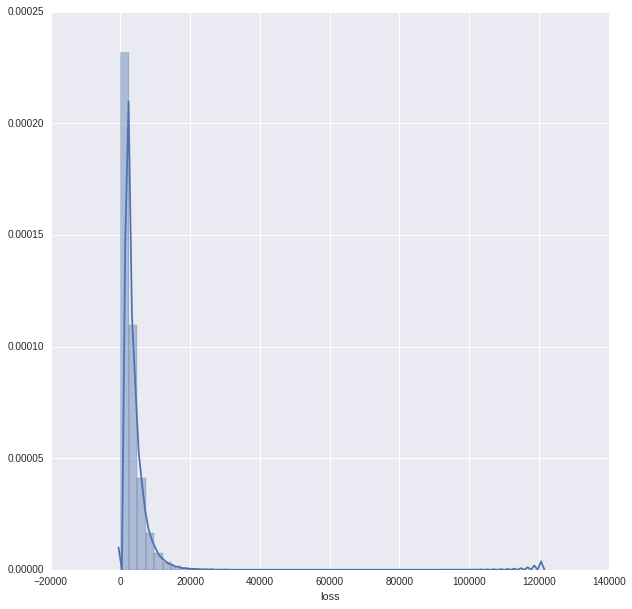

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(data['loss'])

In [7]:
Y = data['loss'].as_matrix()

In [80]:
data_large = data[data['loss']>22000]
data_small = data[data['loss'] <= 22000]

In [81]:
X = data.ix[:,'cat1':'cont14'].as_matrix()
X_large = data_large.ix[:,'cat1':'cont14'].as_matrix()
X_small = data_small.ix[:,'cat1':'cont14'].as_matrix()
Y_large = data_large['loss'].as_matrix()
Y_small = data_small['loss'].as_matrix()

# Over 99% of data has loss  < $20,000, so leaving off the outliers.

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, test_size=0.15)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [93]:
# Computer is old and can't handle a gridsearch so here is where model parameter experimentation goes
#reg = GradientBoostingRegressor(n_estimators=300,learning_rate=0.04, loss='huber', max_depth=8, 
#                                min_samples_split=0.001, max_features=0.65, subsample=0.3,verbose=1)
reg = GradientBoostingRegressor(n_estimators=350,learning_rate=0.04, loss='huber', max_depth=8, 
                                min_samples_split=0.005, max_features=0.65, subsample=0.8,verbose=1)    

In [18]:
reg.fit(X_train,Y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     3232695.7237       70687.3273            8.53m
         2     3143252.9492       98550.4540            8.20m
         3     3050708.0166       93651.2078            8.30m
         4     2943770.6271       85898.2835            8.33m
         5     2860714.5370       78828.0530            8.34m
         6     2789410.8529       76845.8678            8.31m
         7     2717207.6320       68845.2632            8.29m
         8     2666464.0434       66217.7434            8.27m
         9     2598470.9513       62934.7395            8.25m
        10     2549397.1622       56751.0244            8.18m
        20     2127196.4157       29061.9504            8.07m
        30     1916808.3723       15308.0490            7.89m
        40     1823868.1396        9237.4745            7.69m
        50     1745959.2292        6672.8250            7.41m
        60     1678038.0101        3894.3660            7.06m
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.04, loss='huber', max_depth=3,
             max_features=0.95, max_leaf_nodes=9, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=0.001,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=None, subsample=0.8, verbose=1,
             warm_start=False)

In [19]:
print('r2 score: ', r2_score(Y_test,reg.predict(X_test)),'\n' ,'RMS: ' , np.sqrt(mean_squared_error(
   Y_test,reg.predict(X_test))))

r2 score:  0.534083121743 
 RMS:  1934.6686251


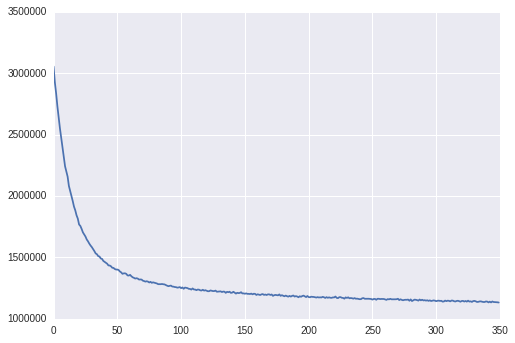

In [95]:
plt.plot(reg.train_score_)

In [94]:
reg.fit(X_small,Y_small)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     3054916.0919       95509.5002           22.59m
         2     2926579.1860      117949.2820           22.09m
         3     2836637.5086      105955.2785           21.82m
         4     2730537.6984       98817.8838           21.65m
         5     2637754.9241       93524.2160           21.71m
         6     2550589.1251       85852.4132           21.95m
         7     2473248.6616       77309.3853           21.50m
         8     2398387.5797       73370.7188           21.42m
         9     2320584.3593       71219.5891           21.44m
        10     2242311.1873       65057.2622           21.29m
        20     1815985.4693       31341.5778           20.73m
        30     1596896.0570       16390.0843           20.13m
        40     1471543.5262        8236.0806           19.36m
        50     1401282.8127        5584.6894           18.77m
        60     1352203.5739        3865.4239           17.82m
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.04, loss='huber', max_depth=8,
             max_features=0.65, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=0.005, min_weight_fraction_leaf=0.0,
             n_estimators=350, presort='auto', random_state=None,
             subsample=0.8, verbose=1, warm_start=False)

In [96]:
Y_pred = reg.predict(X)

/home/james/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


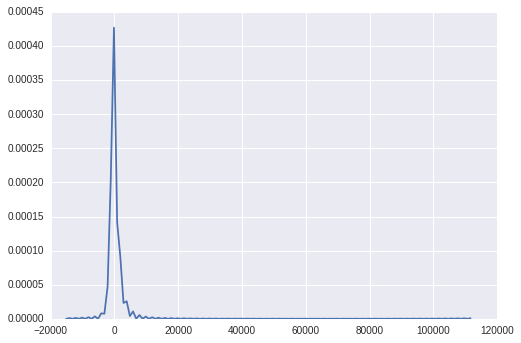

In [97]:
sns.kdeplot(Y-Y_pred)

In [98]:
print((Y-Y_pred).mean())
print((Y-Y_pred).std())

164.134719261
1898.66707165


In [27]:
data_test = pd.read_csv('/home/james/anaconda3/data/astatetest.csv')

In [28]:
for k in range(1,117):
    data_test['cat'+str(k)] = data_test['cat'+str(k)].apply(dummify)

In [29]:
test_data = data_test.ix[:,'cat1':].as_matrix()

In [99]:
test_loss = np.zeros((125546,))
for k in range(125546):
    test_loss[k] = reg.predict(test_data[k].reshape(1,-1))[0] 

In [100]:
data_test['loss'] = pd.Series(test_loss)

In [101]:
output = data_test[['id','loss']]
output.head()

,id,loss
0,4,1704.983836
1,6,1913.047731
2,9,9328.846205
3,12,6077.090973
4,15,1014.909817


In [102]:
output[:15]

,id,loss
0,4,1704.983836
1,6,1913.047731
2,9,9328.846205
3,12,6077.090973
4,15,1014.909817
5,17,2421.817386
6,21,2454.683665
7,28,938.152398
8,32,2439.068307
9,43,2792.598365


In [103]:
output.to_csv('/home/james/anaconda3/data/NEWAS9.csv',index=False)